<a href="https://colab.research.google.com/github/NguyenPhuoc1207/Baitap/blob/Pythoncoban/hoiquytuyentinhdabien.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
from google.colab import files
uploaded = files.upload()

Saving USA_Housing.csv to USA_Housing.csv


In [3]:
df = pd.read_csv('USA_Housing.csv')

In [4]:
y = df["Price"].to_numpy()

In [5]:
#Tiền xử lý dữ liệu bằng cách loại bỏ trường dữ liệu địa chỉ, chuẩn hóa dữ liệu
X = df.drop(['Price', 'Address'], axis=1)

In [6]:
X = X.to_numpy()

In [7]:
scaler = StandardScaler()

In [8]:
X_transform = scaler.fit_transform(X)

In [9]:
# Tạo dữ liệu ngẫu nhiên cho bài toán hồi quy tuyến tính đơn giản với ba tham số
# Thêm một cột giá trị 1 vào X để tính b0
X_b = np.c_[np.ones((5000, 1)), X_transform]

In [10]:
# Khởi tạo các tham số mô hình và learning rate
theta = np.random.randn(6,1)
learning_rates = [0.001, 0.003, 0.009, 0.027, 0.081, 0.243, 0.729]

In [12]:
# Số lần lặp lại và giá trị hàm mất mát ban đầu
n_iterations = 1000
m = 5000
J_history = []
J_historys = []


In [13]:
for learning_rate in learning_rates:
    # TT.Gradient Descent
    for iteration in range(n_iterations):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y.reshape(-1,1))
        theta = theta - learning_rate * gradients
        J_history.append(np.sum((X_b.dot(theta) - y.reshape(-1,1))**2)/(2*m))
    J_historys.append(J_history)
    J_history = []

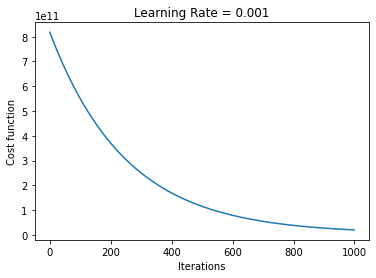

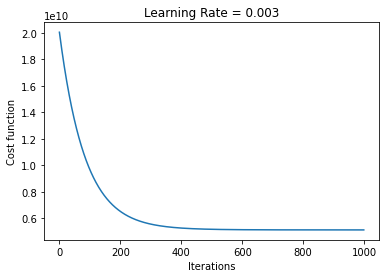

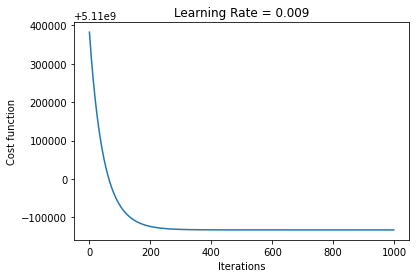

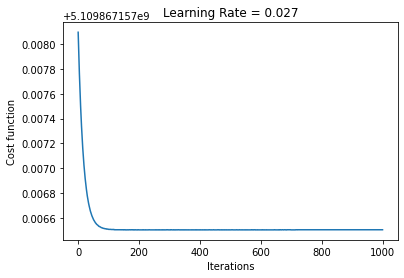

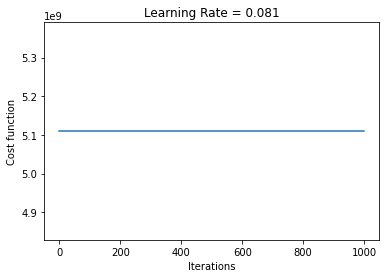

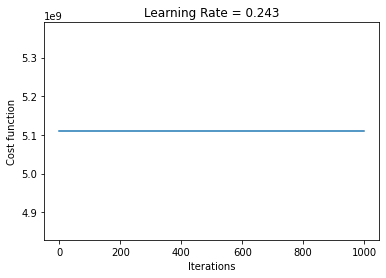

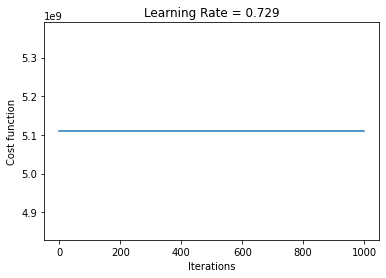

In [14]:
# In ra các tham số mô hình tìm được
# Vẽ biểu đồ giá trị hàm mất mát theo số lần lặp lại
for (i, J_history) in enumerate(J_historys):
    plt.plot(range(n_iterations), J_history)
    plt.xlabel('Iterations')
    plt.ylabel('Cost function')
    plt.title(f'Learning Rate = {learning_rates[i]}');
    plt.show()

với learning rate = 0.01, hàm mất mát giảm rất chậm sau mỗi vòng lặp.
với learning rate >= 0.03, hàm mất mát ở những vòng lặp đầu không giảm, có thể không hội tụ.
Vậy chọn learning rate bằng 0.02



In [16]:
theta

array([[1232072.65414236],
       [ 229955.66241596],
       [ 164205.4309623 ],
       [ 121351.64921816],
       [   2037.52845365],
       [ 150862.17717096]])